# Notebook for reproducing SI figure of critical zenith angle phic

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from mbhl import *

In [3]:
%mkdir -p subfigs-SI-phic

In [29]:
def plot_phic_square_lattice(
    ax,
    delta=100 * nm,
    theta=0,
    r=50 * nm,
    Lr_ratio=3,
    lim=(0, 1 * um, 0, 1 * um),
):
    """Plot the critical phi angles given incident direction theta"""
    theta = np.deg2rad(theta)
    L = r * Lr_ratio
    geom = honeycomb_hole_lattice(r, L, orientation="vertical")
    stencil = Stencil(geom, thickness=delta, gap=2.0 * um, h=2 * nm)
    phic_mesh = stencil.calculate_critical_phi(
        theta=theta, r_search_interval=2, degrees=True
    )
    if ax is not None:
        ax.set_axis_off()
        repeat = (int(np.ceil(lim[1] / L)), int(np.ceil(lim[-1] / L)))
        ax, cm = phic_mesh.draw(
            ax=ax,
            repeat=repeat,
            cmap="inferno",
            domain=lim,
            vmax=75,
        )
        print("max phi_c, ", np.max(phic_mesh.array))
        stencil.draw_stencil_patch_boundaries(
            ax, repeat=repeat, lw=1, alpha=0.5, ls="--"
        )
    return ax, cm

2.0
max phi_c,  27.20526292349821
1.0
max phi_c,  45.61796258391203
0.5
max phi_c,  63.882147138156604
0.25
max phi_c,  76.02666545548371


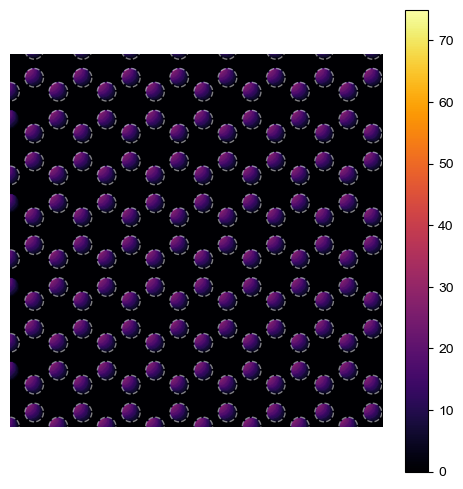

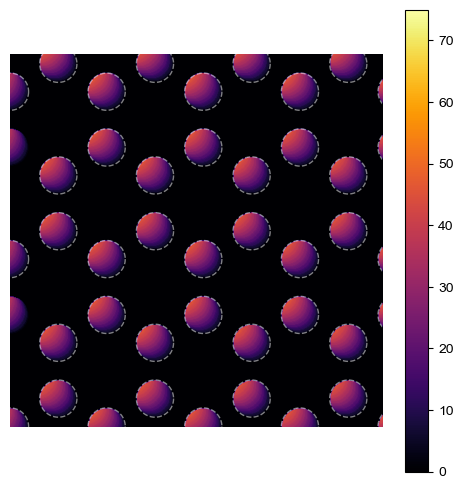

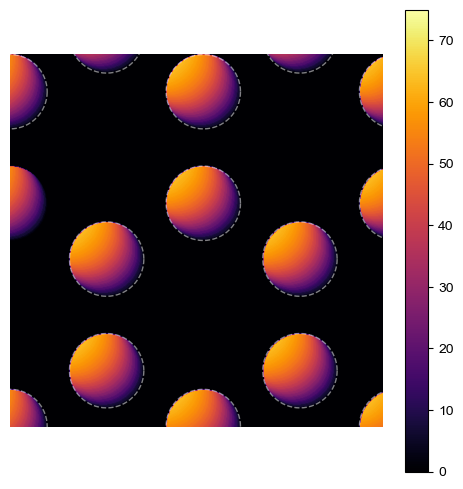

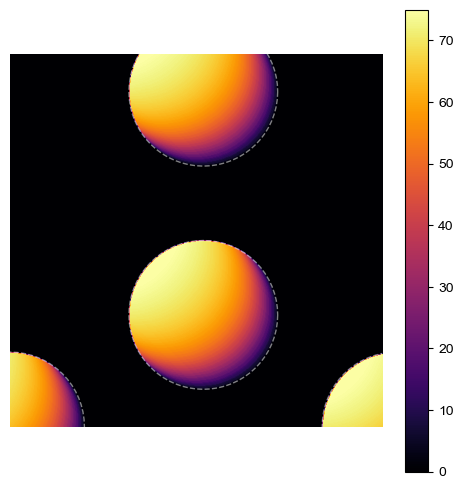

In [30]:
delta = 100 * nm
for r in np.array([25, 50, 100, 200]) * nm:
    dia = r * 2
    dD_ratio = delta / dia
    print(dD_ratio)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax, cm = plot_phic_square_lattice(ax, delta=delta, r=r, theta=45)
    fig.colorbar(mappable=cm)
    fig.savefig(Path("subfigs-SI-phic") / f"phic-r-{r}.png")

In [34]:
np.degrees(np.arctan(4))

75.96375653207353